In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import gdelt
gdelt = gdelt.gdelt(version=2)

In [2]:
results = gdelt.Search(['2016 10 2','2016 10 31'],table='events')[['MonthYear','Actor1CountryCode','Actor2CountryCode','AvgTone','ActionGeo_Lat','ActionGeo_Long']].dropna()

In [3]:
results.shape

(12376, 6)

In [4]:
results.columns

Index(['MonthYear', 'Actor1CountryCode', 'Actor2CountryCode', 'AvgTone',
       'ActionGeo_Lat', 'ActionGeo_Long'],
      dtype='object')

In [5]:
results.describe()

,MonthYear,AvgTone,ActionGeo_Lat,ActionGeo_Long
count,12376.000000,12376.000000,12376.000000,12376.000000
mean,201608.494505,-1.985787,31.997524,-4.045527
std,20.931603,3.532964,20.776868,77.236507
min,200610.000000,-22.666667,-85.622100,-176.533000
25%,201610.000000,-4.291523,25.372900,-77.500000
50%,201610.000000,-1.863354,36.817500,5.750000
75%,201610.000000,0.435414,43.482875,43.786100
max,201610.000000,11.059908,80.336500,179.700000


In [6]:
results

,MonthYear,Actor1CountryCode,Actor2CountryCode,AvgTone,ActionGeo_Lat,ActionGeo_Long
1,201510,USA,USA,-5.633075,33.5000,36.300000
3,201609,COL,COL,-3.853565,4.0000,-72.000000
4,201609,COL,COL,-3.853565,42.1497,-74.938400
5,201609,COL,COL,-0.312500,4.0000,-72.000000
7,201609,COL,COL,-3.853565,4.0000,-72.000000
8,201609,COL,COL,-0.312500,4.0000,-72.000000
29,201609,USA,SYR,-5.633075,33.5000,36.300000
30,201609,USA,SYR,-5.633075,38.8951,-77.036400
31,201609,USA,SYR,-5.633075,33.5000,36.300000
32,201609,USA,SYR,-5.633075,38.8951,-77.036400


In [57]:
import pycountry

In [58]:
list(pycountry.countries)[1]

Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')

AttributeError: Unknown property hue

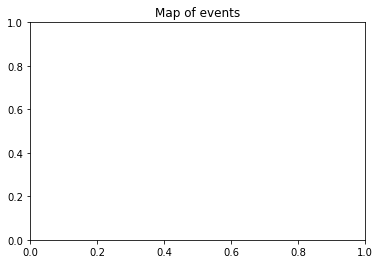

In [13]:
x = results['ActionGeo_Long']
y = results['ActionGeo_Lat']
plt.title('Map of events')
plt.scatter(x, y, hue='AvgTone')